In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Load the data into the pandas environment and identify some basic details of data set
 

In [3]:
data = pd.read_csv("employee.csv")
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [4]:
data.shape

(9, 7)

data has 9 rows and 7 columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


# data contain 3 numerical columns and 4 catogorical columns


In [6]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

age,income,and gender columns contain 2 null values

# 2.Reset the index as "name"


In [7]:
data1= pd.read_csv("employee.csv",index_col="name")
data1


,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3.Select rows for specific names Jcak Morgan and Josh wills


In [8]:
data1.loc[['Jack Morgan','Josh Wills']]


,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4.Select data for multiple values "sales", "finance"

In [9]:
data1.loc[data1['department'].isin(['Sales','Finance'])]


,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5.Display employee who has more than 700 performance score


In [10]:
PS =data1['performance_score']>700
data1.loc[PS]


,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6.Display employee who has more than 500 and less than 700 performance score


In [11]:
ps1 = (data1['performance_score']>500) & (data1['performance_score']<700)
data1.loc[ps1]                                      


,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. check and handle missing values in data set


In [12]:
data1.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [13]:
data1['age'].dtype

dtype('float64')

In [14]:
data1['income'].dtype

dtype('float64')

<AxesSubplot:xlabel='age', ylabel='Count'>

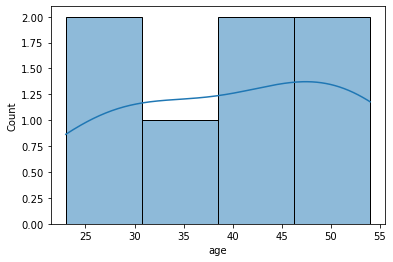

In [15]:
sns.histplot(data= data1, x='age',kde=True)

<AxesSubplot:xlabel='income', ylabel='Count'>

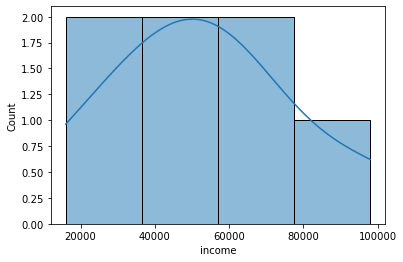

In [16]:
sns.histplot(data= data1, x='income',kde=True)

both are not normal distribution. we can use median to fill age. income is right skewed so use median

In [17]:
#data1['age']= round(data1['age'].fillna(data1['age'].median()),1)
#data1['income']= round(data1['income'].fillna(data1['income'].median()),1)

In [18]:
for i in ['age','income']:
    data1[i] = data1[i].fillna(data1[i].median())

In [19]:
data1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,NaN,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,NaN,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [20]:
data1['gender'] = data1['gender'].fillna('unknown')


In [21]:
data1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,unknown,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,unknown,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [22]:
data1.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# 8 . Check the outliers and handle outliers in performance score using percentiles.

<AxesSubplot:ylabel='performance_score'>

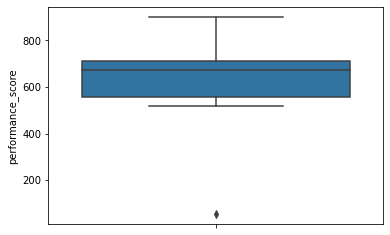

In [23]:
sns.boxplot(data =data1, y ='performance_score')


from figure we can we there is a outlier below range

In [24]:
#to find quartile values
q1,q2,q3 = np.percentile(data1['performance_score'],[25,50,75])
q1,q2,q3

(556.0, 674.0, 711.0)

In [25]:
IQR = q3-q1
IQR

155.0

In [26]:
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)


lower =  323.5
upper =  943.5


In [27]:
outlier = []
for i in data1['performance_score']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)

In [28]:
outlier

[53]

In [29]:
index= data1['performance_score']<lower_limit
data1.loc[index].index

Index(['James Authur'], dtype='object', name='name')

In [30]:
data1.drop('James Authur',inplace=True)

<AxesSubplot:ylabel='performance_score'>

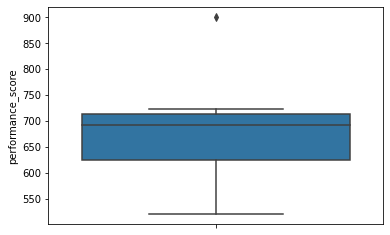

In [31]:
sns.boxplot(data =data1, y ='performance_score')

# 9.check the gender column and do dummy encoding

In [32]:
data1.gender.unique()

array(['unknown', 'F', 'M'], dtype=object)

In [33]:
df=pd.get_dummies(data1,columns=['gender'],drop_first = True)
df

,age,income,department,grade,performance_score,gender_M,gender_unknown
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,0,1
S Kumar,45.0,16000.0,Finance,G0,520,0,0
Jack Morgan,32.0,35000.0,Finance,G2,674,1,0
Ying Chin,45.0,65000.0,Sales,G3,556,0,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,0,0
Satyam Sharma,45.0,62000.0,Sales,G3,649,0,1
Josh Wills,54.0,52000.0,Finance,G3,901,0,0
Leo Duck,23.0,98000.0,Sales,G4,709,1,0


# 10. Do the standard scaling on the feature performance score

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [35]:
col_names = ["age","income","department","grade","performance_score","gender_M","gender_unknown"]
features = df[col_names ]
ct = ColumnTransformer([('somename',StandardScaler(),['performance_score'])],remainder ='passthrough')
ct.fit_transform(features)
x_SS = pd.DataFrame(ct.fit_transform(features))

x_SS.columns = ["performance_score","age","income","department","grade","gender_M","gender_unknown"]
x_SS.index = ["Allen Smith","S Kumar","Jack Morgan","Ying Chin","Dheeraj Patel","Satyam Sharma","Josh Wills","Leo Duck"]
x_SS


,performance_score,age,income,department,grade,gender_M,gender_unknown
Allen Smith,0.392262,45.0,52000.0,Operations,G3,0,1
S Kumar,-1.475872,45.0,16000.0,Finance,G0,0,0
Jack Morgan,-0.058667,32.0,35000.0,Finance,G2,1,0
Ying Chin,-1.144578,45.0,65000.0,Sales,G3,0,0
Dheeraj Patel,0.281831,30.0,42000.0,Operations,G2,0,0
Satyam Sharma,-0.288733,45.0,62000.0,Sales,G3,0,1
Josh Wills,2.030331,54.0,52000.0,Finance,G3,0,0
Leo Duck,0.263425,23.0,98000.0,Sales,G4,1,0
